In [76]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE 

import warnings
warnings.filterwarnings("ignore")


In [77]:
df=pd.read_csv('Fertilizer Prediction.csv')
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [78]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [79]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [80]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [81]:
df.shape

(99, 9)

## Data preprocessing

In [82]:
target=df['Fertilizer Name'].unique()
c=list(df['Fertilizer Name'].value_counts())
c

[22, 18, 17, 14, 14, 7, 7]

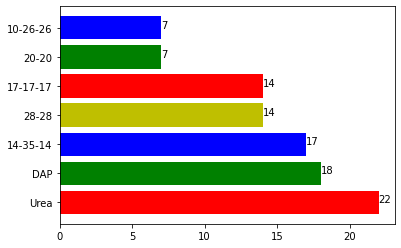

In [83]:
plt.figure()
plt.barh(target, c, color='rgby')
for i , val in enumerate(c):
    plt.text(val,i,str(val))
plt.show()

### the data seems to be unbalanced ,so we have to balance the data

In [84]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [85]:
numeric_cols = ["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
categorical_cols = ["Soil Type", "Crop Type"]

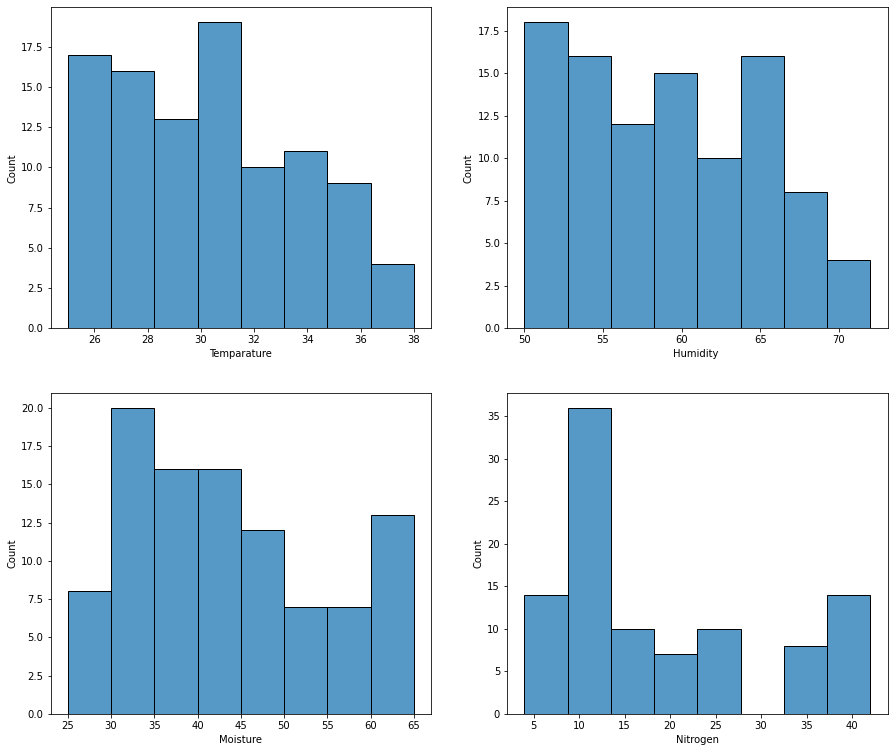

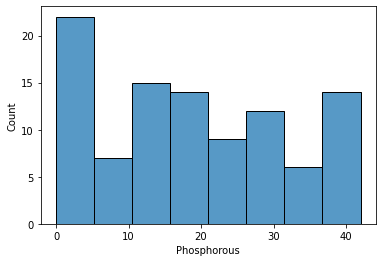

In [86]:
plt.figure(figsize=(15,13))
i = 1
for col in numeric_cols[:-1]:
    plt.subplot(2,2,i)
    sns.histplot(df[col])
    i+=1
plt.show()

sns.histplot(df[numeric_cols[-1]])
plt.show()

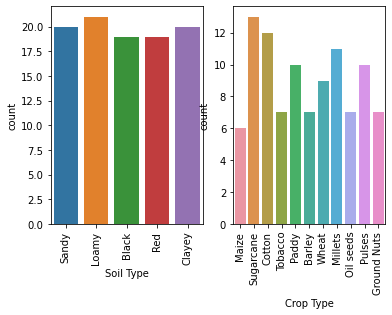

In [87]:

i = 1
for col in categorical_cols:
    plt.subplot(1,2,i)
    sns.countplot(df[col])
    plt.xticks(rotation = 90)
    i+=1
plt.show()

**Bivariate Analysis:**

<Figure size 1512x1224 with 0 Axes>

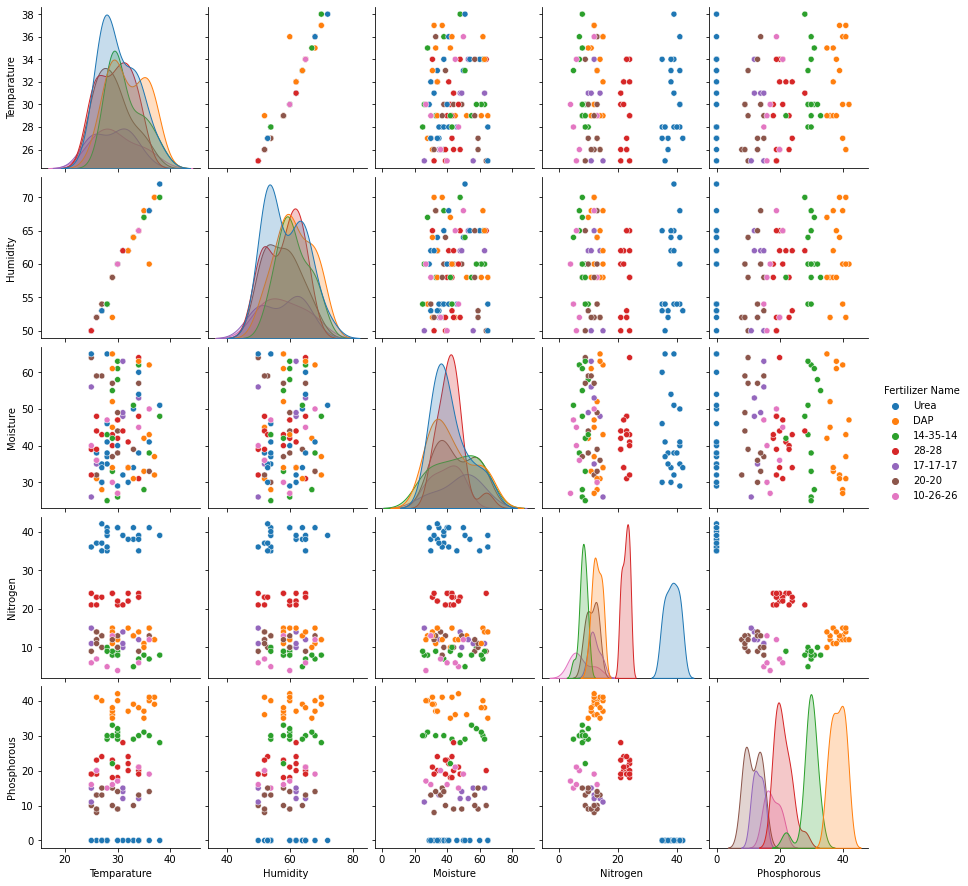

In [88]:
plt.figure(figsize=(21,17))
sns.pairplot(df[numeric_cols + ["Fertilizer Name"]], hue = "Fertilizer Name")
plt.show()

**Correlation Check:**

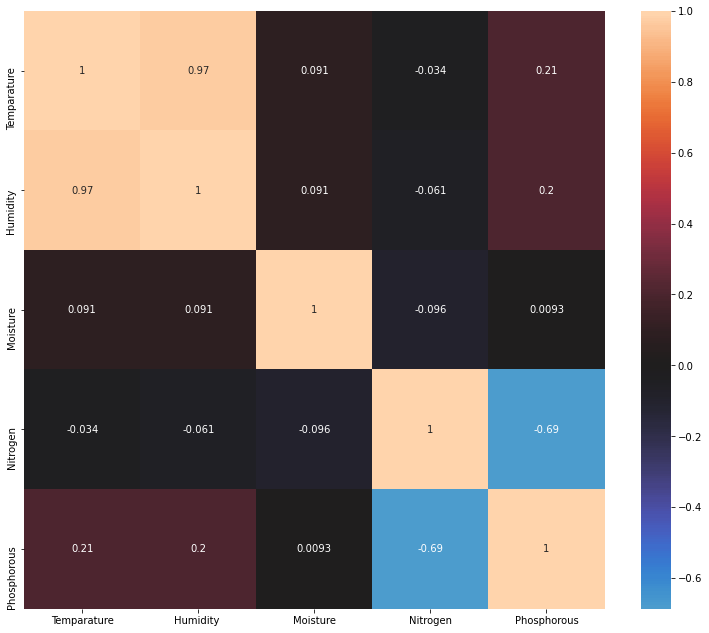

In [89]:
plt.figure(figsize = (13,11))
sns.heatmap(df[numeric_cols].corr(), center = 0, annot = True)
plt.show()

# Encoding Categorical data into Numerical Data:

In [90]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

Creating a copy of the dataframe, so as to not disturb the original dataset values:

In [91]:
DF = df.copy()

***Encoding Soil Type:***

In [92]:
DF["Soil Type"] = le_encoder.fit_transform(DF["Soil Type"])
soiltype_dict = {}
for i in range(len(DF["Soil Type"].unique())):
    soiltype_dict[i] =le_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


***Encoding Crop Names:***

In [93]:
le_encoder2 = LabelEncoder()

In [142]:
DF['Crop Type']=df['Crop Type']
DF["Crop Type"] = le_encoder2.fit_transform(DF["Crop Type"])
croptype_dict = {}
for i in range(len(DF["Crop Type"].unique())):
    croptype_dict[i] = le_encoder2.inverse_transform([i])[0]
print(croptype_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}


***Encoding Fertilizer Names:***

In [95]:
le_encoder3 = LabelEncoder()

In [96]:
DF["Fertilizer Name"] = le_encoder3.fit_transform(DF["Fertilizer Name"])
fertname_dict = {}
for i in range(len(DF["Fertilizer Name"].unique())):
    fertname_dict[i] = le_encoder3.inverse_transform([i])[0]
print(fertname_dict)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [97]:
DF.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


# Upsampling the Data:

In [98]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

In [99]:
X = DF[DF.columns[:-1]] #All columns except 'Fertilizer Name'
y = DF[DF.columns[-1]] #Table with 'Fertilizer Name'

In [100]:
counter = Counter(y)
counter

Counter({6: 22, 5: 18, 1: 14, 4: 17, 2: 7, 3: 14, 0: 7})

In [101]:
upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
counter

Counter({6: 22, 5: 22, 1: 22, 4: 22, 2: 22, 3: 22, 0: 22})

In [102]:
print(f"Total Data after Upsampling: {len(X)}")

Total Data after Upsampling: 154


**Splitting into Training and Test Data in the ratio 80%-20%:**

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)

In [104]:
print("Train Data: ",X_train.shape, y_train.shape)
print("Test Data: ",X_test.shape, y_test.shape)

Train Data:  (123, 8) (123,)
Test Data:  (31, 8) (31,)


# K-Nearest Neighbour(KNN) Classifier:

In [105]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import  KNeighborsClassifier

In [106]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix


In [107]:
from sklearn.metrics import accuracy_score
error = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy at k = ",i," is ",accuracy)
    error.append(np.mean(predictions != y_test))

Accuracy at k =  1  is  0.9032258064516129
Accuracy at k =  2  is  0.8387096774193549
Accuracy at k =  3  is  0.8709677419354839
Accuracy at k =  4  is  0.8064516129032258
Accuracy at k =  5  is  0.8387096774193549
Accuracy at k =  6  is  0.7096774193548387
Accuracy at k =  7  is  0.8709677419354839
Accuracy at k =  8  is  0.7419354838709677
Accuracy at k =  9  is  0.7419354838709677
Accuracy at k =  10  is  0.7096774193548387
Accuracy at k =  11  is  0.7096774193548387
Accuracy at k =  12  is  0.7096774193548387
Accuracy at k =  13  is  0.6774193548387096
Accuracy at k =  14  is  0.6451612903225806
Accuracy at k =  15  is  0.6129032258064516
Accuracy at k =  16  is  0.5806451612903226
Accuracy at k =  17  is  0.6129032258064516
Accuracy at k =  18  is  0.6451612903225806
Accuracy at k =  19  is  0.6451612903225806
Accuracy at k =  20  is  0.6451612903225806
Accuracy at k =  21  is  0.6129032258064516
Accuracy at k =  22  is  0.5806451612903226
Accuracy at k =  23  is  0.58064516129032

Minimum Error:- 0.0967741935483871 at K = 1


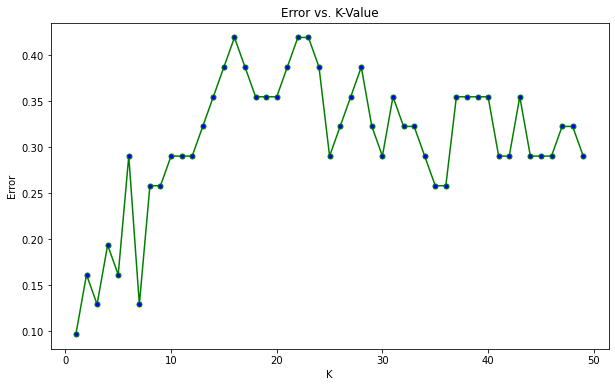

In [108]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error,color='green',marker='o',markerfacecolor='blue', markersize=5)
plt.title('Error vs. K-Value')
plt.xlabel('K')
plt.ylabel('Error')
print("Minimum Error:-",min(error),"at K =",error.index(min(error))+1)

# Standard Vector Machine (SVM) Classifier:

In [109]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [110]:
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True))])

**Testing with Test Data:**

Accuracy on Test Data:  96.7741935483871


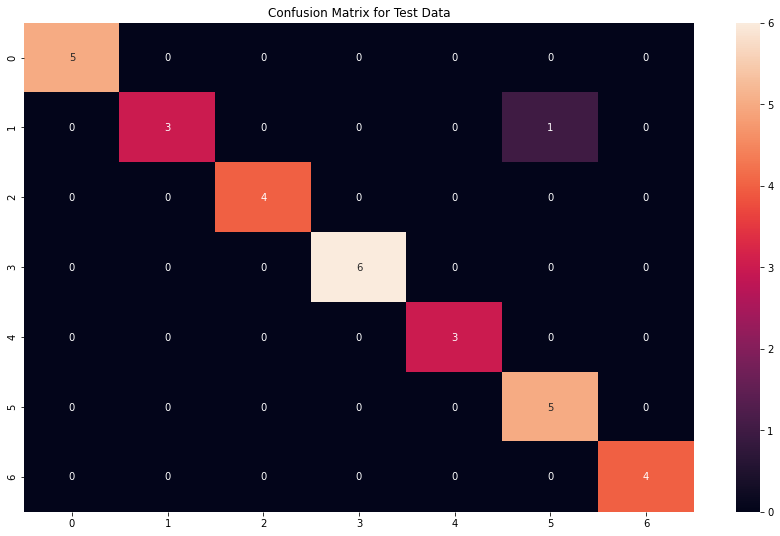

In [111]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
prediction_values = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, prediction_values)
print("Accuracy on Test Data: ",accuracy*100)
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, prediction_values), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

**Testing on the Full Data:**

Accuracy on Full Data:  99.35064935064936


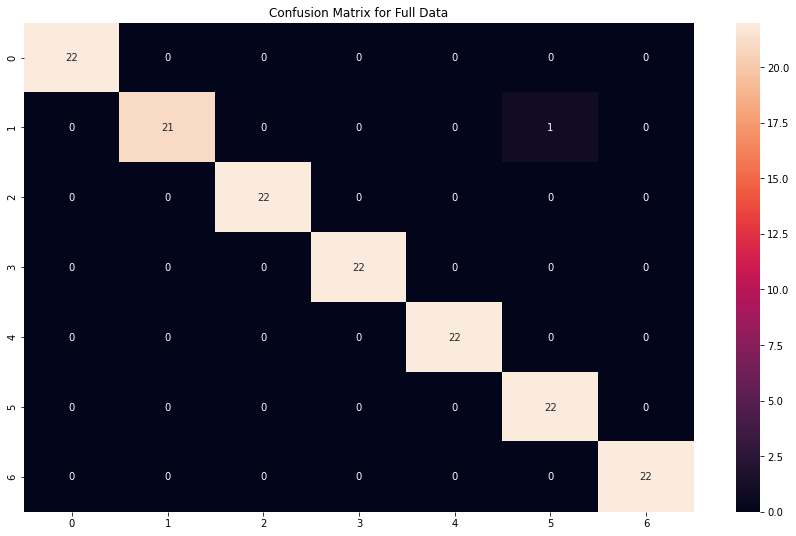

In [112]:
prediction_values = svm_pipeline.predict(X.values)
accuracy = accuracy_score(y, prediction_values)
print(f"Accuracy on Full Data: ",accuracy*100)
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, prediction_values), annot = True)
plt.title("Confusion Matrix for Full Data")
plt.show()

# Decision Tree:

In [113]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [114]:
# maximum depth of decision trees is 9
dtree_pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = 9))
dtree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                        random_state=0))])

**Testing with Test Data:**

Accuracy on Test Data:  96.7741935483871


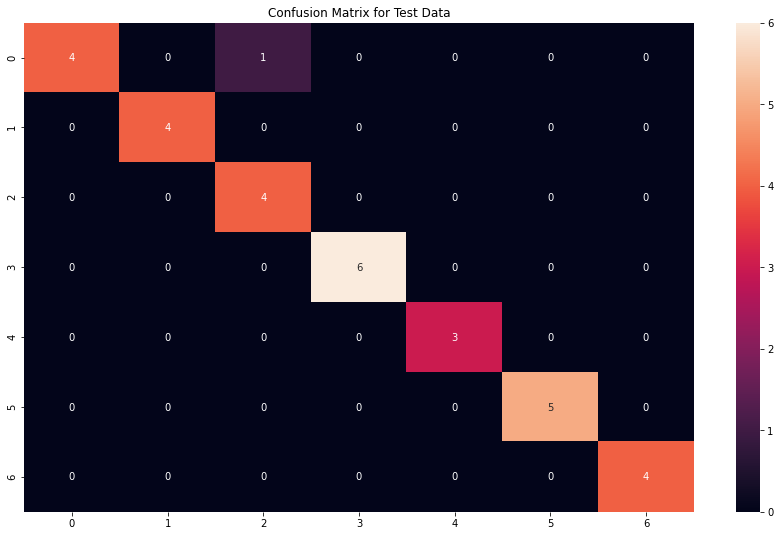

In [115]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
prediction_values = dtree_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, prediction_values)
print("Accuracy on Test Data: ",accuracy*100)
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, prediction_values), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

**Testing with Full Data:**

Accuracy on Full Data:  99.35064935064936


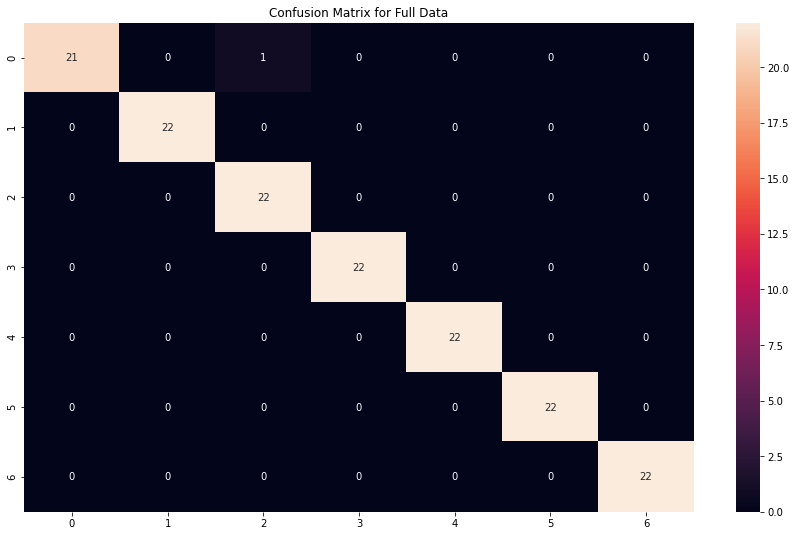

In [116]:
prediction_values = dtree_pipeline.predict(X.values)
accuracy = accuracy_score(y, prediction_values)
print("Accuracy on Full Data: ",accuracy*100)
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, prediction_values), annot = True)
plt.title("Confusion Matrix for Full Data")
plt.show()

# Logistic Regression:

In [117]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [118]:
logreg_pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=2))
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=2))])

**Testing with Test Data:**

Accuracy on Test Data:  96.7741935483871


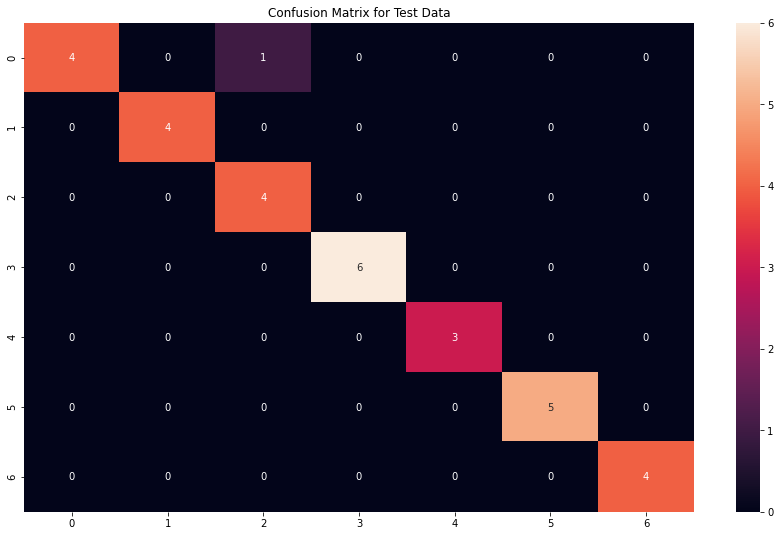

In [119]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
prediction_values = logreg_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, prediction_values)
print("Accuracy on Test Data: ",accuracy*100)
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, prediction_values), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

**Testing with Full Data:**

Accuracy on Full Data:  98.7012987012987


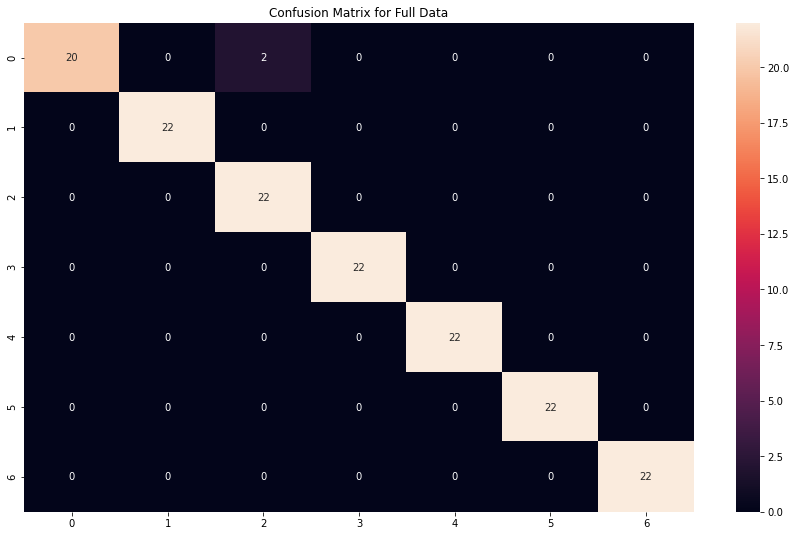

In [120]:
prediction_values = logreg_pipeline.predict(X.values)
accuracy = accuracy_score(y, prediction_values)
print("Accuracy on Full Data: ",accuracy*100)
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, prediction_values), annot = True)
plt.title("Confusion Matrix for Full Data")
plt.show()

# Random Forest:

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [122]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=18))])

**Testing with Test Data:**

Accuracy on Test Data:  100.0


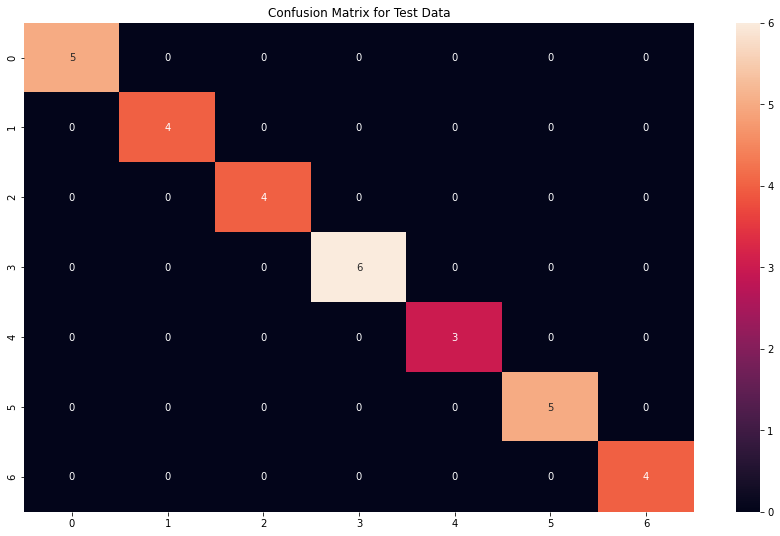

In [123]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
prediction_values = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, prediction_values)
print("Accuracy on Test Data: ",accuracy*100)
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, prediction_values), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

**Testing with Full Data:**

Accuracy on Full Data:  100.0


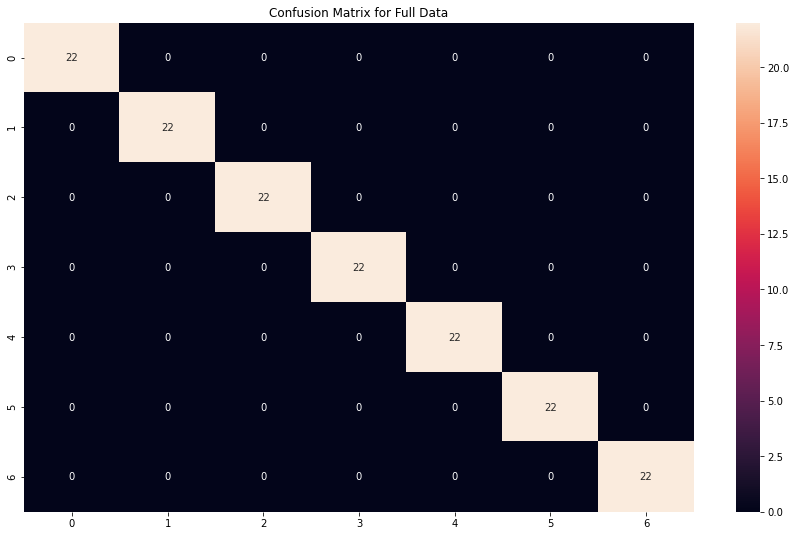

In [124]:
prediction_values = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, prediction_values)
print("Accuracy on Full Data: ",accuracy*100)
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, prediction_values), annot = True)
plt.title("Confusion Matrix for Full Data")
plt.show()

In [125]:
from sklearn.naive_bayes import GaussianNB

nb_pipeline = make_pipeline(StandardScaler(), GaussianNB())
nb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

Accuracy on Test Data:  100.0


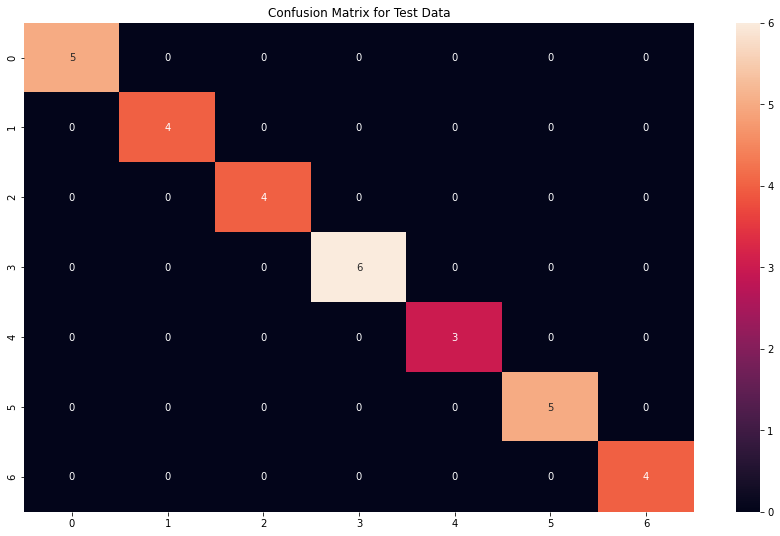

In [126]:
prediction_values = nb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, prediction_values)
print("Accuracy on Test Data: ",accuracy*100)
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, prediction_values), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

# XG Boost Classifier:

In [127]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import xgboost
from xgboost import XGBClassifier

In [128]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

[19:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1,
                               objective='multi:softprob', random_state=18,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

**Testing with Test Data:**

Accuracy on Test Data:  96.7741935483871


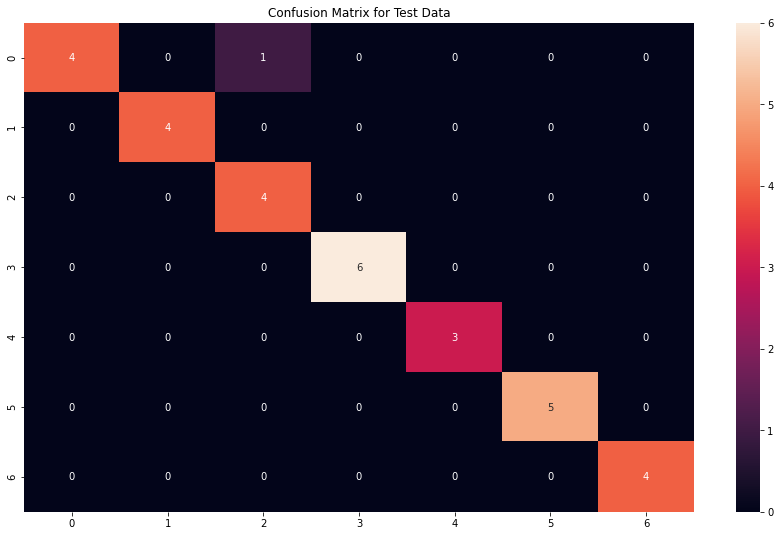

In [129]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
prediction_values = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, prediction_values)
print("Accuracy on Test Data: ",accuracy*100)
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, prediction_values), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

**Testing with Full Data:**

Accuracy on Full Data:  99.35064935064936


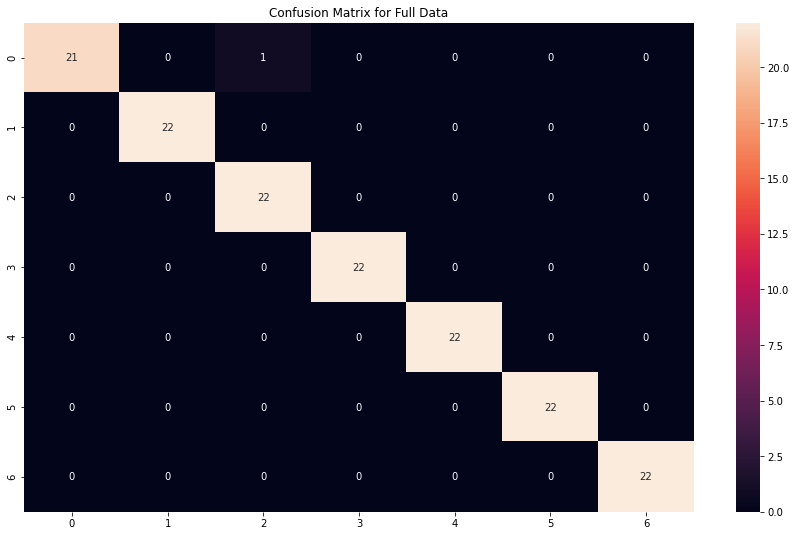

In [130]:
prediction_values = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, prediction_values)
print("Accuracy on Full Data: ",accuracy*100)
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, prediction_values), annot = True)
plt.title("Confusion Matrix for Full Data")
plt.show()

In [131]:
from sklearn.ensemble import StackingClassifier

In [132]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('Logistic Regression', LogisticRegression(random_state=1)))
    level0.append(('Random Forest',RandomForestClassifier(random_state=1)))
    level0.append(('Naive Bayes', GaussianNB()))
    # define meta learner model
    level1 = XGBClassifier()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1)
    return model

In [133]:
smodel=get_stacking() #construct a stacking model

In [134]:
st_pipeline = make_pipeline(StandardScaler(), smodel)
st_pipeline.fit(X_train, y_train)

[19:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('stackingclassifier',
                 StackingClassifier(estimators=[('Logistic Regression',
                                                 LogisticRegression(random_state=1)),
                                                ('Random Forest',
                                                 RandomForestClassifier(random_state=1)),
                                                ('Naive Bayes', GaussianNB())],
                                    final_estimator=XGBClassifier(base_score=None,
                                                                  booster=None,
                                                                  colsample_bylevel=None,
                                                                  colsample_bynode=Non...
                                                                  importance_type='gain',
                                                                  interaction_co

Accuracy on Test Data:  100.0


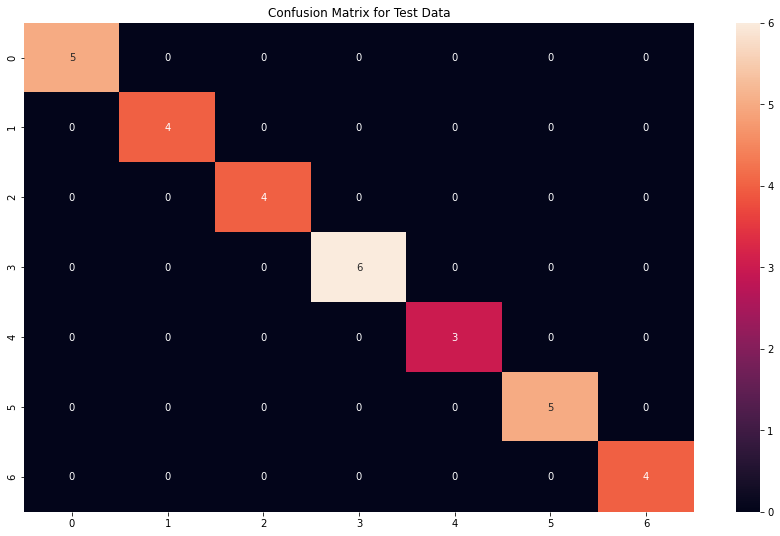

In [135]:
prediction_values = st_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, prediction_values)
print("Accuracy on Test Data: ",accuracy*100)
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, prediction_values), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

In [136]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
st_pkl_filename = 'Stacking_fertilizer_model.pkl'
# Open the file to save as pkl file
st_Model_pkl = open(st_pkl_filename, 'wb')
pickle.dump(smodel, st_Model_pkl)
# Close the pickle instances
st_Model_pkl.close()

In [137]:
DF.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [138]:
data = np.array([[30,50, 34, 4, 6, 40, 10,40]])
int(smodel.predict(data))

4

In [139]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [140]:
data = np.array([[30,50, 34, 4, 6, 40, 10,40]])
fertname_dict[int(smodel.predict(data))]

'28-28'